# VGG16 Pre-defined Model Approach

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import random
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to load and preprocess images
def load_and_preprocess_images(image_paths):
    images = []
    for path in tqdm(image_paths, desc="Loading and preprocessing images"):
        img = image.load_img(path, target_size=(512,512))
        img = image.img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

# Function to extract features using a pre-trained VGG16 model
def extract_features(images):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = tf.keras.Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
    features = []
    for img in tqdm(images, desc="Extracting features using VGG16"):
        feature = model.predict(np.expand_dims(img, axis=0))
        features.append(feature.flatten())
    return np.array(features)

# Function to perform Isomap dimensionality reduction
def perform_isomap(features):
    isomap = Isomap(n_components=2)
    embeddings = isomap.fit_transform(features)
    return embeddings

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.015, alpha = 1)
    
# Function to plot the embeddings
def plot_embeddings(embeddings, image_paths, title='Isomap Clustering', thumbnail_size=(64,64), num_samples=10, w=100):
    fig, ax = plt.subplots(figsize=(10,10), dpi=200)
    selected_indices = random.sample(range(len(image_paths)), num_samples)
    ax.scatter(embeddings[:, 0], embeddings[:, 1], s=3, color='lightgrey')
    for i in selected_indices:
        ab = AnnotationBbox(getImage(image_paths[i]), (embeddings[i,0], embeddings[i,1]), frameon=False)
        ax.add_artist(ab)
        # img = Image.open(image_paths[i])
        # img.thumbnail(thumbnail_size)
        # plt.imshow(img, extent=(embeddings[i, 0] - w/2, embeddings[i, 0] + w/2, embeddings[i, 1]-w/2, embeddings[i, 1] + w/2), aspect='auto')
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    plt.savefig('isomap.png', bbox_inches='tight')
    plt.show()

In [2]:
image_dir = '../data/sodankyla_cam/pine_ground_cam/'

image_paths_curated = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg') and filename.split('_')[-1][:2] in ['10', '11', '12', '13', '14']]
image_paths_curated.sort()

# Load and preprocess images
images_curated = load_and_preprocess_images(image_paths_curated)

Loading and preprocessing images: 100%|████████████████████████████████████████████| 3640/3640 [02:06<00:00, 28.81it/s]


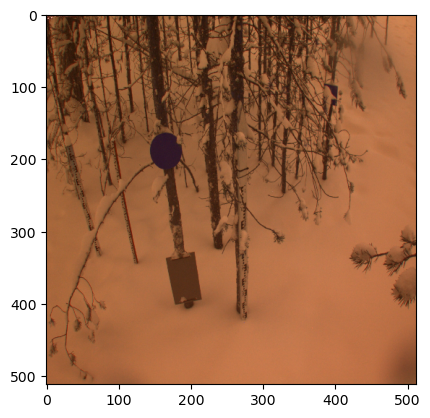

In [11]:
# (images_curated[0] - images_curated[0].min())/(images_curated[0].max() - images_curated[0].min())
plt.imshow((images_curated[0] - images_curated[0].min())/(images_curated[0].max() - images_curated[0].min()))

In [2]:
# # Extract features using VGG16
# features = extract_features(images_curated)

In [3]:
# # Perform Isomap dimensionality reduction
# embeddings = perform_isomap(features)

In [ ]:
# np.save('features.npy', features)
# np.save('embeddings.npy', embeddings)

features = np.load('../data/unet_experiment/features.npy')
embeddings = np.load('../data/unet_experiment/embeddings.npy')

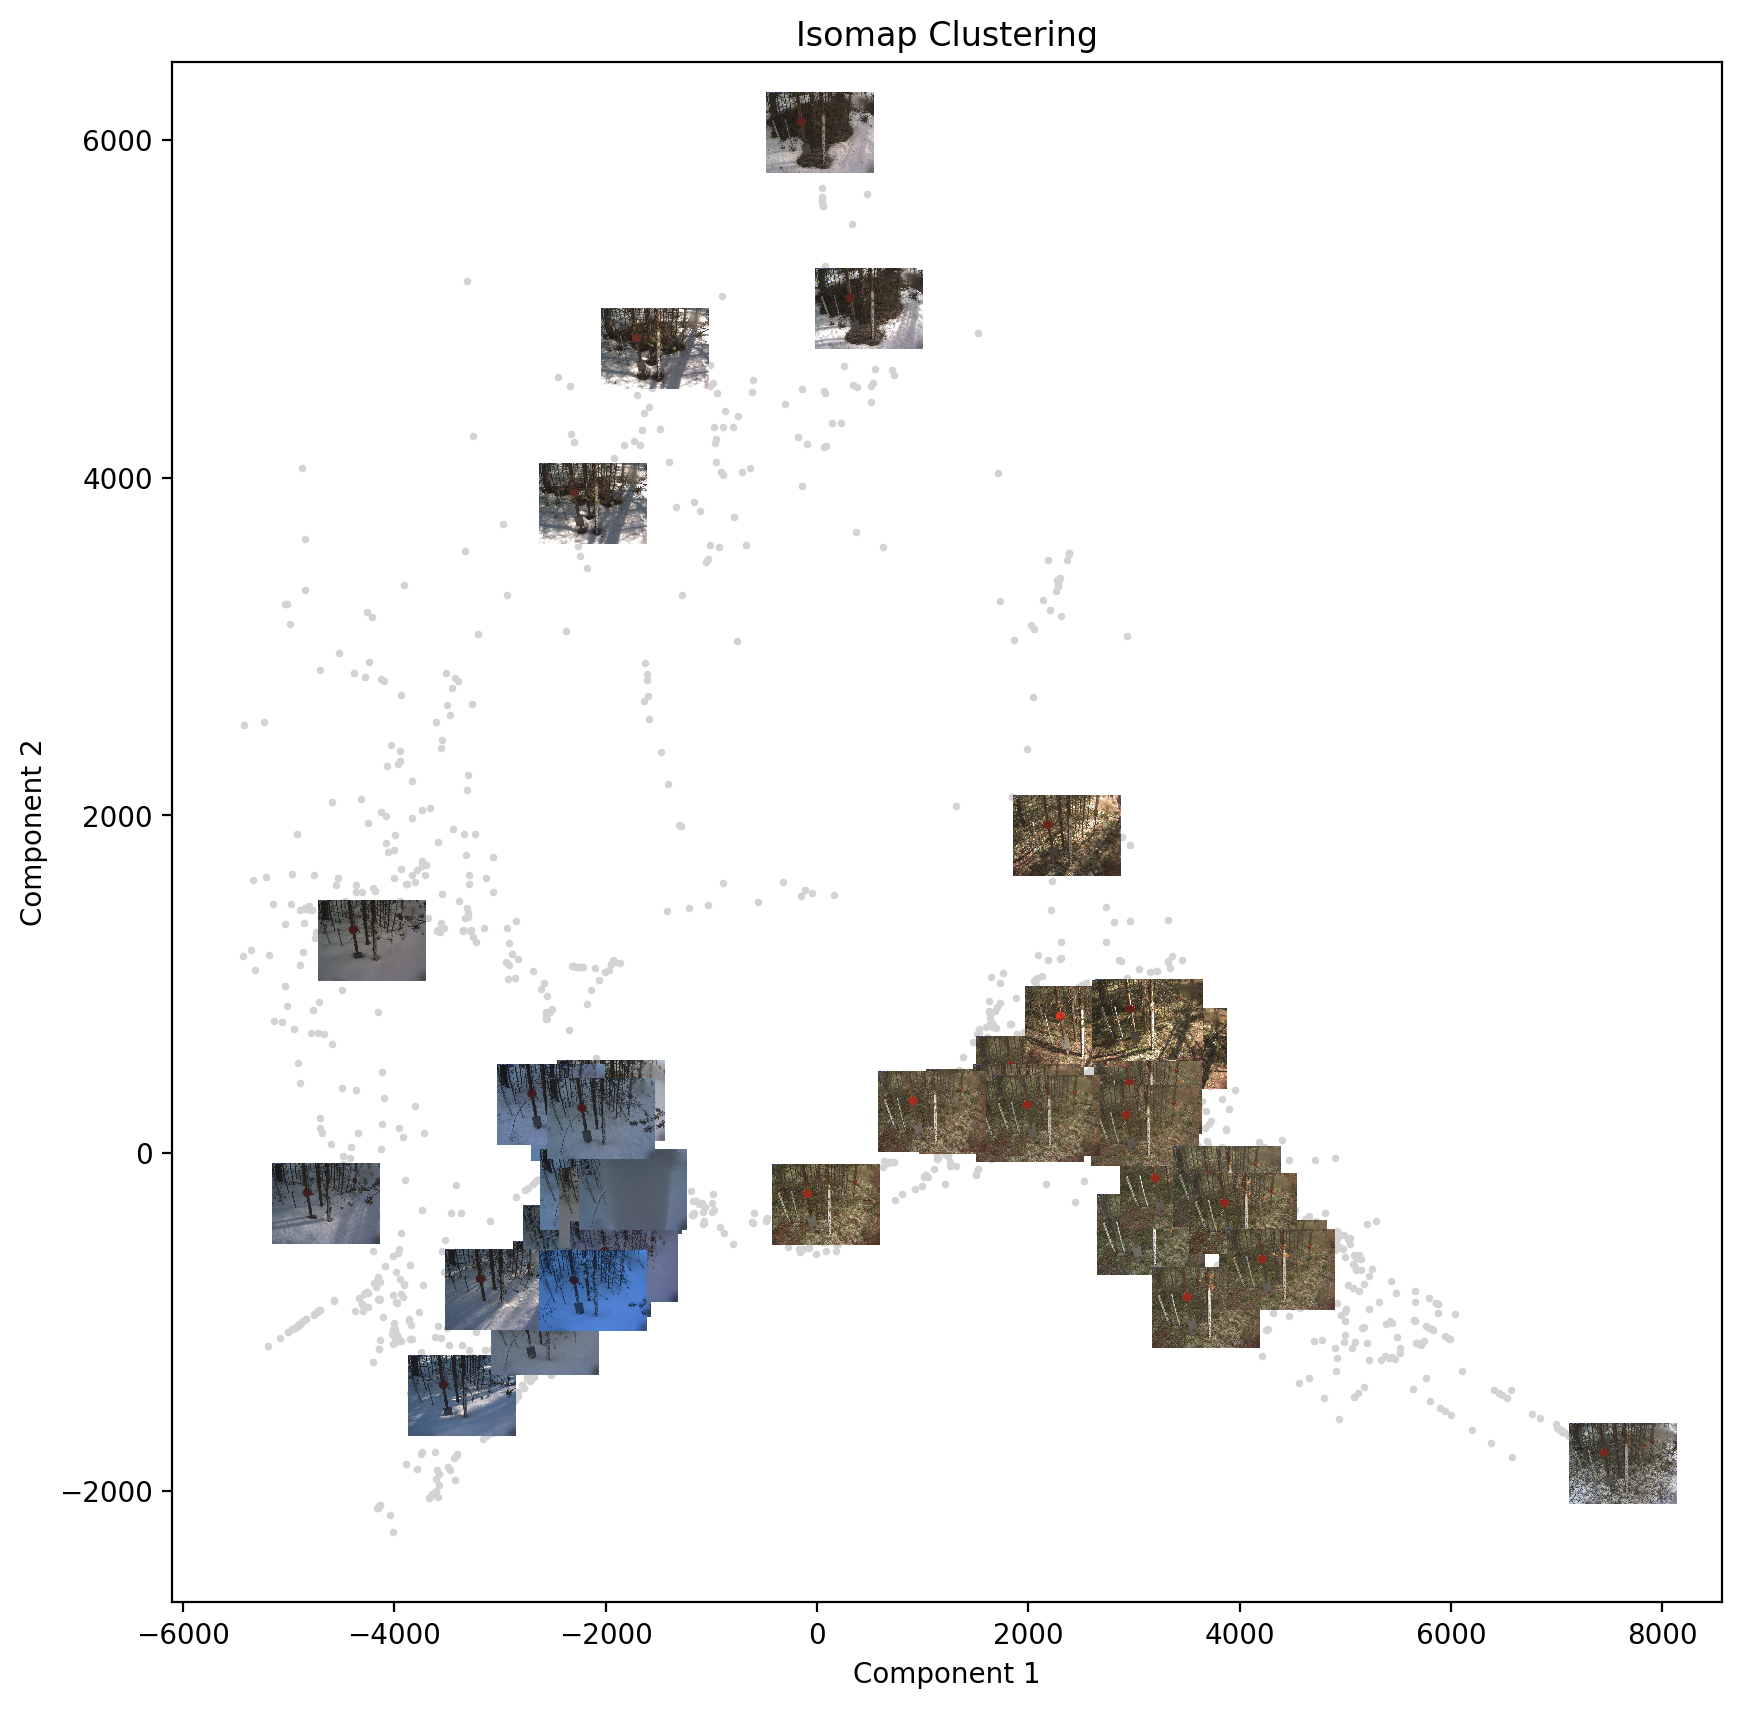

In [22]:
# Plot the embeddings
plot_embeddings(embeddings, image_paths_curated, num_samples=50)

# Probability Assignment through Trained Classification Model